# Matplotlib: ProblemSet


- Para este Set se deben guardar las imagenes usando la siguiente instrucción:

``` python

plt.savefig("img/CEDULA_NumeralEjercicio.png")

#ejemplo:

plt.savefig("img/1025468421_1.png")
```

- enviar los resultados en un archivo comprimido que lleve por nombre su cédula al correro: alejandro.mesa2@udea.edu.co; Asunto: Graficas_Python

- en el contenido poner el nombre completo

- deadline **dd de mm de 2018**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problema 1

Dado un conjunto de datos en un archivo, capturarlos e imprimir una gráfica de su histograma.

>- darle nombre al grafico
>- nombrar apropiadamente los ejes 

#### Solución

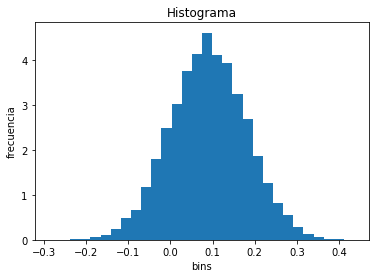

In [3]:
ps3_1= np.loadtxt("data/PS3_1.dat")

count, bins, ignored = plt.hist(ps3_1, 30, normed=True)
plt.title("Histograma")
plt.xlabel("bins")
plt.ylabel("frecuencia")
plt.savefig("imgs/PS3_1.png")


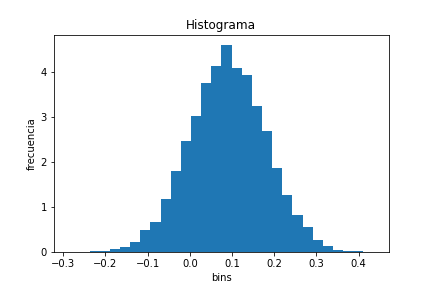

In [4]:
from IPython.display import Image
Image("imgs/PS3_1.png")

## Problema 2

usando la serie de taylor centrada en 0 para la función seno, graficar el resultado de la suma parcial para 2, 5, 10 y 50 términos **Etiquetarlos**
>- darle nombre al grafico
>- nombrar apropiadamente los ejes 
>- graficar entre (-20,-20) y (20,20)
#### Solución

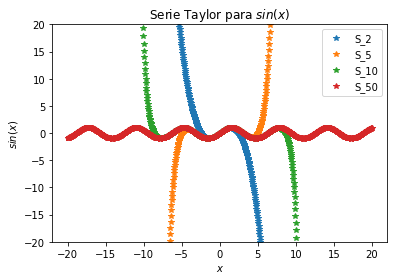

In [6]:
def seno(x, order):
    a = x
    s = a
    for i in range(1, order):
        a *= -1 * x**2 / ((2 * i) * (2 * i + 1))
        s += a
    return s

senoT = np.vectorize(seno, excluded=['order'])

x=np.linspace(-20,20,1000)

S_2=senoT(x,2)
S_5=senoT(x,5)
S_10=senoT(x,10)
S_50=senoT(x,50)

plt.plot(x,S_2,'*',label="S_2")
plt.plot(x,S_5,'*',label="S_5")
plt.plot(x,S_10,'*',label="S_10")
plt.plot(x,S_50,'*',label="S_50")

plt.ylim(-20,20)
plt.xlabel("$x$")
plt.ylabel("$sin(x)$")
plt.title("Serie Taylor para $sin(x)$")
plt.legend()
plt.savefig("imgs/PS3_2.png")


## Problema 3
realizar un método al que ingrese su cédula y capture el tercer dígito como a y el sexto como b, si alguno de ellos es 0 reemplazarlo por el siguiente hasta que encuentre un dígito apropiado. (si llega al último, continuar con el primero) usar dichos valores a y b para hacer una gráfica polar de la siguiente función:

 $$r=a+b cos (\theta)$$
 
>- asegurese de que la grafica se vea completa
>- darle un titulo a la grafica


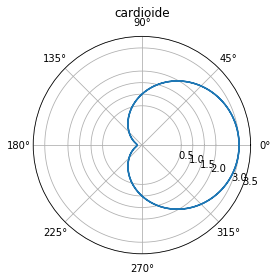

In [8]:
def valores(cc):
    num=[int(i) for i in str(cc)]
    ind_a=2
    ind_b=5
    while(True):
        if(num[ind_a]==0 or num[ind_b]==0):
            if (num[ind_a]==0):
                ind_a=(ind_a+1)%len(num)
            if (num[ind_b]==0):
                ind_b=(ind_b+1)%len(num)
        else:
            a=num[ind_a]
            b=num[ind_b]
            break
    return a,b

a,b=valores(1017228006)



def grafica(a,b,theta):
    return a+b*np.cos(theta)

theta=np.linspace(0,np.pi*4,1000)
r=grafica(a,b,theta)

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2,3,3.5])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)

ax.set_title("cardioide", va='bottom')
plt.savefig("imgs/PS3_3.png")

## Problema 4
cargar una imagen cualquiera en formato png, graficar en un multiplot de 4 posiciones:
en el subplot de la esquina superior izquierda, graficar la imagen original, en la superior derecha la imagen en escala de grises, es la esquina inferior izquierda la imagen en negativo y en la última graficar la imagen con interpolación bicúbica (bicubic) y usando el mapa de color “nipy_spectral”


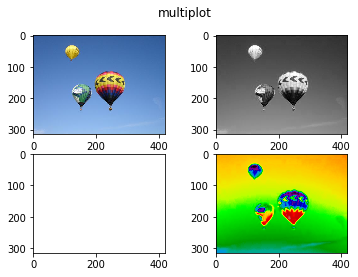

In [10]:
import matplotlib.image as mpimg

def inversor(img):
    inv=img
    for i in range(inv.shape[0]):
        for j in range(inv.shape[1]):
            inv[i,j,0]=255 -inv[i,j,0]
            inv[i,j,1]=255 -inv[i,j,1]
            inv[i,j,2]=255 -inv[i,j,2]
    return inv

img=mpimg.imread('imgs/imagen.png')

fig=plt.figure()

ax=fig.add_subplot(221)
ax.imshow(img)

ax=fig.add_subplot(222)
lum_img = img[:,:,0]
ax.imshow(lum_img, cmap="gray")

ax=fig.add_subplot(223)
inv=inversor(img)
ax.imshow(inv)

ax=fig.add_subplot(224)
lum_img = img[:,:,0]
ax.imshow(lum_img, interpolation="bicubic",cmap="nipy_spectral")

fig.suptitle("multiplot")
plt.savefig("imgs/PS3_4.png")